In [1]:
import numpy as np
import pandas as pd

def generate_large_dataset(num_items):
    np.random.seed(0)  # For reproducibility
    values = np.random.randint(1, 1000, size=num_items)  # Random values between 1 and 1000
    weights = np.random.randint(1, 100, size=num_items)  # Random weights between 1 and 100
    return values, weights

def save_to_csv(values, weights, filename):
    # Create a DataFrame
    df = pd.DataFrame({
        'Value': values,
        'Weight': weights
    })
    # Save DataFrame to CSV
    df.to_csv(filename, index=False)

# Example usage
num_items = 10000  # Large dataset with 10,000 items
values, weights = generate_large_dataset(num_items)

# Save the dataset to a CSV file
filename = 'knapsack_dataset.csv'
save_to_csv(values, weights, filename)

print(f'Dataset with {num_items} items saved to {filename}.')

Dataset with 10000 items saved to knapsack_dataset.csv.


In [3]:
import pandas as pd
import time

def knapsack_01(weights, values, capacity, time_limit):
    n = len(values)
    # Space used for the DP table
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    start_time = time.time()  # Start the timer

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if time.time() - start_time > time_limit:
                print("Time limit exceeded.")
                return dp[n][capacity]  # Return the best value found so far

            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    end_time = time.time()  # End the timer
    print(f'Time taken for 0/1 Knapsack: {end_time - start_time:.6f} seconds')
    print(f'Space used for DP table: {n * (capacity + 1) * 8 / (1024 ** 2):.6f} MB')  # Assuming 8 bytes per integer
    # Backtrack to find the selected items
    selected_items = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:  # Item i is included
            selected_items.append((values[i - 1], weights[i - 1]))  # Store value and weight
            w -= weights[i - 1]  # Reduce the remaining capacity

    return dp[n][capacity], selected_items

# Load the dataset from CSV
filename = 'knapsack_dataset.csv'  # Make sure this file exists in the current directory
data = pd.read_csv(filename)

# Extract weights and values
weights = data['Weight'].tolist()
values = data['Value'].tolist()

# Define capacity and time limit
capacity = 500  # Example capacity
time_limit = 60 # 1 second time limit

# Run the knapsack algorithm
max_value,selected_items = knapsack_01(weights, values, capacity, time_limit)
print(f'Maximum value in 0/1 Knapsack: {max_value}')
print("Selected items (Value, Weight):",len(selected_items))

Time taken for 0/1 Knapsack: 3.117488 seconds
Space used for DP table: 38.223267 MB
Maximum value in 0/1 Knapsack: 153992
Selected items (Value, Weight): 222


In [5]:
import pandas as pd
import time
import random
import csv

# Step 1: Create a sample dataset (you can skip this part if you already have the CSV)
def generate_sample_csv(filename, num_items=100):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Value', 'Weight'])
        for _ in range(num_items):
            value = random.randint(10, 100)
            weight = random.randint(5, 50)
            writer.writerow([value, weight])

# Generate CSV file
filename = 'knapsack_dataset.csv'
generate_sample_csv(filename)

# Step 2: Define the Item class
class Item:
    def __init__(self, value, weight):  # Fixed constructor
        self.value = value
        self.weight = weight
        self.ratio = value / weight  # Value-to-weight ratio

# Step 3: Define the Fractional Knapsack function
def fractional_knapsack(items, capacity, time_limit):
    start_time = time.time()

    # Sort items by value-to-weight ratio in descending order
    sorting_start_time = time.time()
    items.sort(key=lambda x: x.ratio, reverse=True)
    sorting_end_time = time.time()

    total_value = 0.0
    selected_items = []

    for item in items:
        if capacity <= 0:
            break

        if time.time() - start_time > time_limit:
            print("Time limit exceeded.")
            return total_value, selected_items

        if item.weight <= capacity:
            total_value += item.value
            capacity -= item.weight
            selected_items.append((item.value, item.weight, 1.0))
        else:
            fraction = capacity / item.weight
            total_value += item.ratio * capacity
            selected_items.append((item.value, item.weight, fraction))
            capacity = 0

    end_time = time.time()
    print(f'Time taken for sorting in Fractional Knapsack: {sorting_end_time - sorting_start_time:.6f} seconds')
    print(f'Time taken for Fractional Knapsack: {end_time - start_time:.6f} seconds')
    print(f'Space used for items list: {len(items) * (8 + 8 + 8) / (1024 ** 2):.6f} MB')  # Rough estimate
    return total_value, selected_items

# Step 4: Load dataset and run algorithm
data = pd.read_csv(filename)
items = [Item(row['Value'], row['Weight']) for index, row in data.iterrows()]
capacity = 500
time_limit = 60  # seconds

max_value_fractional, selected_items = fractional_knapsack(items, capacity, time_limit)

# Step 5: Output results
print(f'Maximum value in Fractional Knapsack: {max_value_fractional}')
print("Number of Selected items (Value, Weight, Fraction):", len(selected_items))


Time taken for sorting in Fractional Knapsack: 0.000035 seconds
Time taken for Fractional Knapsack: 0.000102 seconds
Space used for items list: 0.002289 MB
Maximum value in Fractional Knapsack: 2407.5454545454545
Number of Selected items (Value, Weight, Fraction): 31


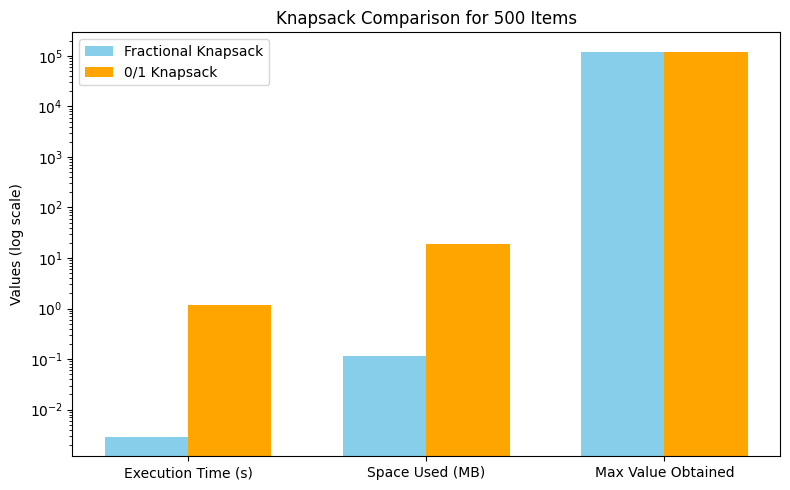

In [6]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Execution Time (s)", "Space Used (MB)", "Max Value Obtained"]
fractional = [0.002874, 0.114441, 121584.0]
zero_one = [1.195413, 19.111633, 121584]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, fractional, width, label="Fractional Knapsack", color='skyblue')
plt.bar(x + width/2, zero_one, width, label="0/1 Knapsack", color='orange')
plt.xticks(x, metrics)
plt.yscale('log')
plt.title("Knapsack Comparison for 500 Items")
plt.ylabel("Values (log scale)")
plt.legend()
plt.tight_layout()
plt.show()

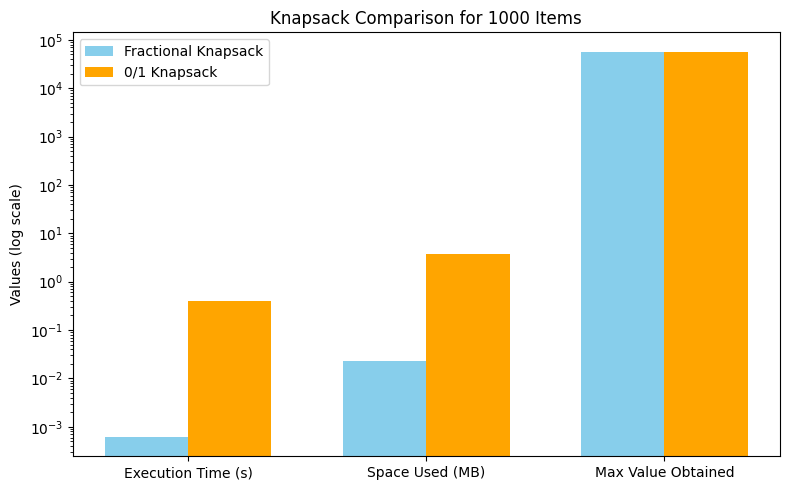

In [7]:
fractional = [0.000615, 0.022888, 57142.5]
zero_one = [0.405739, 3.822327, 57114]

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, fractional, width, label="Fractional Knapsack", color='skyblue')
plt.bar(x + width/2, zero_one, width, label="0/1 Knapsack", color='orange')
plt.xticks(x, metrics)
plt.yscale('log')
plt.title("Knapsack Comparison for 1000 Items")
plt.ylabel("Values (log scale)")
plt.legend()
plt.tight_layout()
plt.show()

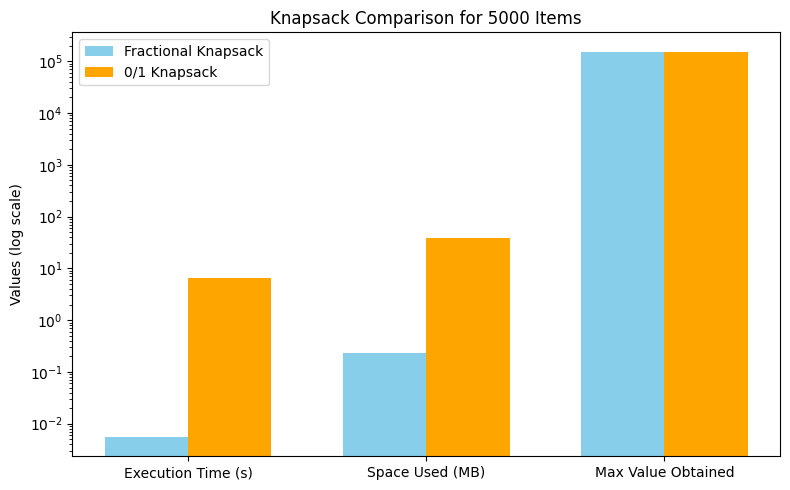

In [8]:
fractional = [0.005529, 0.228882, 153992.0]
zero_one = [6.435977, 38.223267, 153992]

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, fractional, width, label="Fractional Knapsack", color='skyblue')
plt.bar(x + width/2, zero_one, width, label="0/1 Knapsack", color='orange')
plt.xticks(x, metrics)
plt.yscale('log')
plt.title("Knapsack Comparison for 5000 Items")
plt.ylabel("Values (log scale)")
plt.legend()
plt.tight_layout()
plt.show()